<a href="https://colab.research.google.com/github/SehanArandara/DL-Codepro/blob/main/01_Regression_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets     # install the opendatasets library

In [ ]:
import pandas as pd
import opendatasets as od   # to get the data set from the keggal
import tensorflow as tf
import matplotlib.pyplot as  plt

In [ ]:
od.download('https://www.kaggle.com/datasets/andonians/random-linear-regression')    # donwload the data set and save inside this

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sehanarandara
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/andonians/random-linear-regression


100%|██████████| 7.63k/7.63k [00:00<00:00, 10.1MB/s]

In [ ]:
data  = pd.read_csv('/content/random-linear-regression/test.csv')
data.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [ ]:
data.shape

(300, 2)

In [ ]:
# divide the label data into input and output label that means the x lable and y label
x_label = data['x']
y_label = data['y']


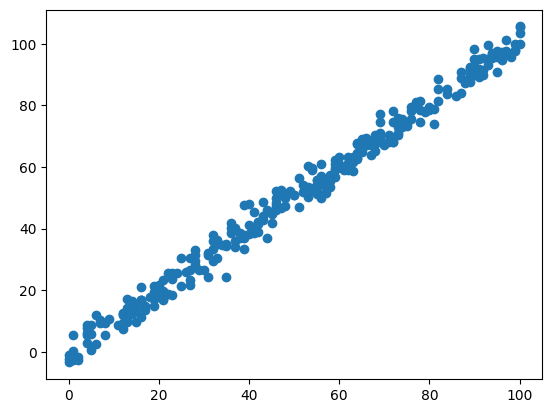

In [ ]:
plt.scatter(x_label,y_label)
plt.show()

In [ ]:
# divide the data set into two train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_label,y_label,test_size=0.2)

In [ ]:
# we can see the size of the train and test data set
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((240,), (60,), (240,), (60,))

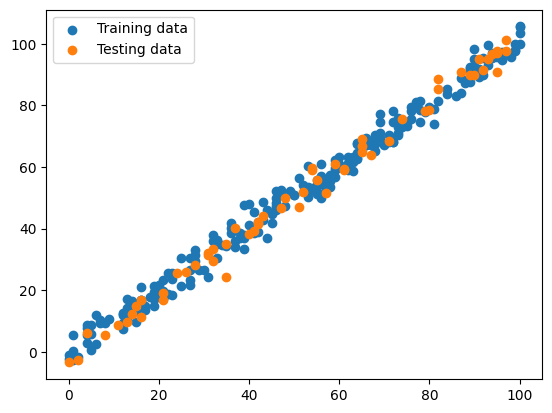

In [ ]:
# scatter to show the distribution of the test and train data
plt.scatter(x_train,y_train,label='Training data')
plt.scatter(x_test,y_test,label='Testing data')
plt.legend()
plt.show()

In [ ]:
# build up the nueral network Architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64,input_shape=(1,)),     # hidden layer
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),   # output layer
])

#Compile the modle
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
              metrics=['mae'])

# fit the model save it in variable
history= model.fit(x_train,y_train,epochs=8)


Epoch 1/8


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 30.3870 - mae: 30.3870
Epoch 2/8
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 15.0718 - mae: 15.0718 
Epoch 3/8
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.1002 - mae: 6.1002  
Epoch 4/8
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.2244 - mae: 5.2244  
Epoch 5/8
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.8442 - mae: 2.8442  
Epoch 6/8
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.9556 - mae: 2.9556  
Epoch 7/8
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.6929 - mae: 2.6929  
Epoch 8/8
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.5706 - mae: 2.5706 


In [ ]:
# model summary
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_34 (Dense)                     │ (None, 64)                  │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 10)                  │             650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,369 (9.26 KB)

 Trainable params: 789 (3.08 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,580 (6.18 KB)

In [ ]:
# predict the test values
y_predicted = model.predict(x_test)
y_predicted[:5]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


array([[23.371048 ],
       [ 3.7107728],
       [80.38584  ],
       [59.742554 ],
       [52.86146  ]], dtype=float32)

In [ ]:
y_test[:5]

,y
115,25.634763
185,6.079390
101,88.544759
289,59.129130
186,59.072472


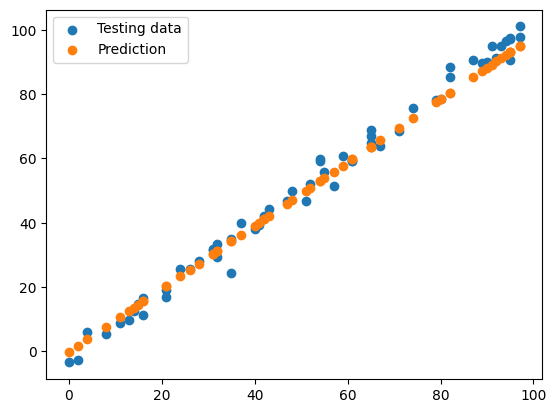

In [ ]:
# plt.scatter(x_train,y_train,label='Training data')
plt.scatter(x_test,y_test,label='Testing data')
plt.scatter(x_test,y_predicted,label='Prediction')     # best outfit line
plt.legend()
plt.show()

In [ ]:
# model evaluation
model.evaluate(x_test,y_test)         # return the Perfermance error   -> Means absolute error - we defined it in the model

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.7002 - mae: 2.7002  


[2.7369298934936523, 2.7369298934936523]

In [ ]:
# Mean Absolute error
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_predicted)

2.7369299358861654

In [ ]:
# Mean Squarred Error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_predicted)

11.689498790409276

In [ ]:
# bias and weights values of the model
model.get_weights()


[array([[-5.11900932e-02, -2.98307801e-04,  1.78315444e-03,
          1.15287881e-02,  1.63635798e-03, -5.10440432e-02,
          3.57431471e-02, -4.18176316e-02, -2.96016317e-03,
         -1.14876285e-01,  7.64947981e-02,  3.02036643e-01,
          1.18294857e-01, -8.83759931e-03, -2.67397970e-01,
         -4.40715626e-03, -1.10565580e-01, -1.10582598e-01,
         -4.05404810e-03, -4.51447908e-03, -2.01198712e-01,
         -3.58105823e-03,  6.70726970e-02, -1.20981736e-03,
          2.03439474e-01, -1.44210413e-01, -3.36548686e-03,
          1.36435062e-01,  8.22923779e-02, -6.66589825e-04,
         -2.72302657e-01,  1.91128284e-01,  1.63259313e-01,
          2.15232885e-03, -6.26922073e-03,  1.54811814e-02,
          5.09466417e-03, -1.15249744e-02, -1.72249079e-01,
          1.65802225e-01, -4.64819511e-03, -2.46632248e-01,
         -2.22229078e-01, -2.05526233e-01, -1.66503429e-01,
          9.55299214e-02,  2.18677253e-01,  1.61098957e-01,
          2.10873852e-03,  8.84508598e-0

In [ ]:
# get the history and show the epoch and  loss
history.history

{'loss': [26.189359664916992,
  12.053135871887207,
  6.700930118560791,
  4.876378536224365,
  3.050546169281006,
  3.0355467796325684,
  2.6109354496002197,
  2.547992467880249],
 'mae': [26.189359664916992,
  12.053135871887207,
  6.700930118560791,
  4.876378536224365,
  3.050546169281006,
  3.0355467796325684,
  2.6109354496002197,
  2.547992467880249]}

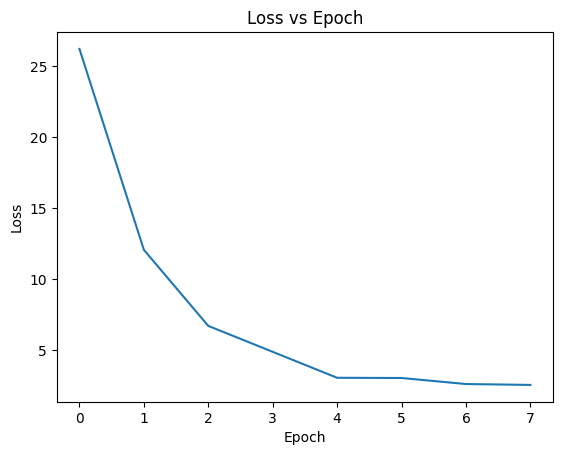

In [ ]:
x_range = range(8)
plt.plot(x_range,history.history['loss'])
plt.title('Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()